## This notebook collects results for the figure 6 of the Batch size Ablation Study for the real datasets

In [17]:
import pandas as pd
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
counts = {
    'B_CD8T': 474521,
    'B_T': 1435388,
    'PBMC_all': 2238732,
    'TCells': 1280445,
    'PBMC5K': 72208619,
    'Chen': 22331703,
    'Camp': 2762889,
    'HLCA_aorta': 1026532,
    'HLCA_lung': 4317000,
    'HLCA_marrow': 15854124,
    'CellLines': 5516980,
    'HSC': 13634167,
    'FibrocardRNA': 50000000,
    'FibrocardATAC': 138840495, 
}

In [3]:
def get_category(x):
    return f'{x["method"]}{x["dataset"]}{x["batch_size"]}'

def get_category_lookup(x):
    return f'{x["method"]}{x["dataset"]}500'

def vlookup(df, x):
    return df.set_index('cated').loc[x['vlookup_cated'], 'mean']

In [9]:
from copy import deepcopy

def get_input_data(from_range, to_range):

    outputs = []

    search_db = {}
    batch_sizes = [250, 500, 1000, 2000, 4000]

    for dataset in [
        'B_T', 'B_CD8T', 'PBMC_all', 'TCells', 'Camp', 'HLCA_aorta', 'HLCA_lung', 'HLCA_marrow', 'HSC'
    ]:
        method = 'sparse_GPU'
        metric = 'kendall'
        for index, batch_size in enumerate(batch_sizes):
            metric = 'kendall'
            filename = f'../results/RealDatasetsBatchSizeFixed/{dataset}/{batch_size}/{method}_{metric}.csv'
            # print(filename)
            if not os.path.exists(filename):
                # continue
                if method == 'dense_pythonic':
                    method_new = 'scipy'
                else:
                    method_new = method

                output = deepcopy(search_db[f'{method}{dataset}{batch_sizes[index-1]}'])
                output['missing'] = True
                output['batch_size'] = batch_size
                
                # output = {
                #     'metric': metric,
                #     'dataset': dataset,
                #     'mean': 10 ** 11,
                #     'method': method_new,
                #     'missing': True
                # }
            else:
                df = pd.read_csv(filename)
                values = df.loc[from_range:to_range, df.columns[0]]

                if len(values) == 0:
                    values = df.loc[df.shape[0] - 1, df.columns[0]]

                mean_value = values[values > 0].mean()
                if method == 'dense_pythonic':
                    method_new = 'scipy'
                    mean_value *= 24
                else:
                    method_new = method

                output = {
                    'metric': metric,
                    'dataset': dataset,
                    'mean': mean_value,
                    'log_mean': np.log10(mean_value),
                    'method': method_new,
                    'missing': False,
                    'batch_size': batch_size,
                }
            search_db[f'{method}{dataset}{batch_size}'] = output
            print(f'{method}{dataset}{batch_size}')

            outputs.append(output)
    df_updated = pd.DataFrame(outputs)
    df_updated['cated'] = df_updated.apply(get_category, axis=1)
    df_updated['vlookup_cated'] = df_updated.apply(get_category_lookup, axis=1)
    
    df_updated['base'] = df_updated.apply(lambda x: vlookup(df_updated, x), axis=1)
    df_updated['acceleration'] = df_updated['base'] / df_updated['mean']
    df_updated.loc[df_updated.method == 'scipy', 'method'] = 'scipy'
    df_updated.loc[df_updated.method == 'dense_pandas', 'method'] = 'pandas'
    df_updated.loc[df_updated.method == 'dense_CPU', 'method'] = 'CPU'
    df_updated.loc[df_updated.method == 'dense_factoextra', 'method'] = 'factoextra'
    df_updated.loc[df_updated.method == 'dense_amap', 'method'] = 'amap'
    df_updated.loc[df_updated.method == 'dense_raft', 'method'] = 'raft-dense'
    df_updated.loc[df_updated.method == 'sparse_raft', 'method'] = 'raft-sparse'
    df_updated.loc[df_updated['method'] == 'CPU', 'method'] = 'GADES-CPU-dense'
    df_updated.loc[df_updated['method'] == 'dense_GPU', 'method'] = 'GADES-GPU-dense'
    df_updated.loc[df_updated['method'] == 'sparse_GPU', 'method'] = 'GADES-GPU-sparse'
    df_updated.loc[df_updated['method'] == 'sparse_CPU', 'method'] = 'GADES-CPU-sparse'
    df_updated.loc[df_updated['method'] == 'dense_raft', 'method'] = 'raft'
    # df_updated['log_acceleration'] = df_updated.acceleration.apply(lambda x: np.log10(x))
    return df_updated

In [10]:
all_df = get_input_data(0, 100)

sparse_GPUB_T250
sparse_GPUB_T500
sparse_GPUB_T1000
sparse_GPUB_T2000
sparse_GPUB_T4000
sparse_GPUB_CD8T250
sparse_GPUB_CD8T500
sparse_GPUB_CD8T1000
sparse_GPUB_CD8T2000
sparse_GPUB_CD8T4000
sparse_GPUPBMC_all250
sparse_GPUPBMC_all500
sparse_GPUPBMC_all1000
sparse_GPUPBMC_all2000
sparse_GPUPBMC_all4000
sparse_GPUTCells250
sparse_GPUTCells500
sparse_GPUTCells1000
sparse_GPUTCells2000
sparse_GPUTCells4000
sparse_GPUCamp250
sparse_GPUCamp500
sparse_GPUCamp1000
sparse_GPUCamp2000
sparse_GPUCamp4000
sparse_GPUHLCA_aorta250
sparse_GPUHLCA_aorta500
sparse_GPUHLCA_aorta1000
sparse_GPUHLCA_aorta2000
sparse_GPUHLCA_aorta4000
sparse_GPUHLCA_lung250
sparse_GPUHLCA_lung500
sparse_GPUHLCA_lung1000
sparse_GPUHLCA_lung2000
sparse_GPUHLCA_lung4000
sparse_GPUHLCA_marrow250
sparse_GPUHLCA_marrow500
sparse_GPUHLCA_marrow1000
sparse_GPUHLCA_marrow2000
sparse_GPUHLCA_marrow4000
sparse_GPUHSC250
sparse_GPUHSC500
sparse_GPUHSC1000
sparse_GPUHSC2000
sparse_GPUHSC4000


In [11]:
!ls ../../Hobotnica-GPU/results/RealDatasets/

B_CD8T	   FibrocardATAC  HSC		    sparse_matrix_1_5000_1_5000.csv
B_T	   FibrocardRNA   MouseAtlas	    sparse_matrix_1_5000_5001_10000.csv
Camp	   HLCA_aorta	  organogenes_100K  Splenocyte
CellLines  HLCA_lung	  PBMC5K	    TabulsMuris
Chen	   HLCA_marrow	  PBMC_all	    TCells


In [12]:
all_df

,metric,dataset,mean,log_mean,method,missing,batch_size,cated,vlookup_cated,base,acceleration
0,kendall,B_T,1.862522e+08,8.270101,GADES-GPU-sparse,False,250,sparse_GPUB_T250,sparse_GPUB_T500,1.750750e+08,0.939989
1,kendall,B_T,1.750750e+08,8.243224,GADES-GPU-sparse,False,500,sparse_GPUB_T500,sparse_GPUB_T500,1.750750e+08,1.000000
2,kendall,B_T,1.879643e+08,8.274075,GADES-GPU-sparse,False,1000,sparse_GPUB_T1000,sparse_GPUB_T500,1.750750e+08,0.931427
3,kendall,B_T,2.463845e+08,8.391613,GADES-GPU-sparse,False,2000,sparse_GPUB_T2000,sparse_GPUB_T500,1.750750e+08,0.710576
4,kendall,B_T,2.463845e+08,8.391613,GADES-GPU-sparse,True,4000,sparse_GPUB_T4000,sparse_GPUB_T500,1.750750e+08,0.710576
5,kendall,B_CD8T,1.915754e+07,7.282340,GADES-GPU-sparse,False,250,sparse_GPUB_CD8T250,sparse_GPUB_CD8T500,1.946531e+07,1.016065
6,kendall,B_CD8T,1.946531e+07,7.289261,GADES-GPU-sparse,False,500,sparse_GPUB_CD8T500,sparse_GPUB_CD8T500,1.946531e+07,1.000000
7,kendall,B_CD8T,2.037256e+07,7.309046,GADES-GPU-sparse,False,1000,sparse_GPUB_CD8T1000,sparse_GPUB_CD8T500,1.946531e+07,0.955467
8,kendall,B_CD8T,2.005655e+07,7.302256,GADES-GPU-sparse,False,2000,sparse_GPUB_CD8T2000,sparse_GPUB_CD8T500,1.946531e+07,0.970521
9,kendall,B_CD8T,2.045858e+07,7.310875,GADES-GPU-sparse,False,4000,sparse_GPUB_CD8T4000,sparse_GPUB_CD8T500,1.946531e+07,0.951450


In [13]:
all_df_sequential = get_input_data(0, 100)

sparse_GPUB_T250
sparse_GPUB_T500
sparse_GPUB_T1000
sparse_GPUB_T2000
sparse_GPUB_T4000
sparse_GPUB_CD8T250
sparse_GPUB_CD8T500
sparse_GPUB_CD8T1000
sparse_GPUB_CD8T2000
sparse_GPUB_CD8T4000
sparse_GPUPBMC_all250
sparse_GPUPBMC_all500
sparse_GPUPBMC_all1000
sparse_GPUPBMC_all2000
sparse_GPUPBMC_all4000
sparse_GPUTCells250
sparse_GPUTCells500
sparse_GPUTCells1000
sparse_GPUTCells2000
sparse_GPUTCells4000
sparse_GPUCamp250
sparse_GPUCamp500
sparse_GPUCamp1000
sparse_GPUCamp2000
sparse_GPUCamp4000
sparse_GPUHLCA_aorta250
sparse_GPUHLCA_aorta500
sparse_GPUHLCA_aorta1000
sparse_GPUHLCA_aorta2000
sparse_GPUHLCA_aorta4000
sparse_GPUHLCA_lung250
sparse_GPUHLCA_lung500
sparse_GPUHLCA_lung1000
sparse_GPUHLCA_lung2000
sparse_GPUHLCA_lung4000
sparse_GPUHLCA_marrow250
sparse_GPUHLCA_marrow500
sparse_GPUHLCA_marrow1000
sparse_GPUHLCA_marrow2000
sparse_GPUHLCA_marrow4000
sparse_GPUHSC250
sparse_GPUHSC500
sparse_GPUHSC1000
sparse_GPUHSC2000
sparse_GPUHSC4000


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

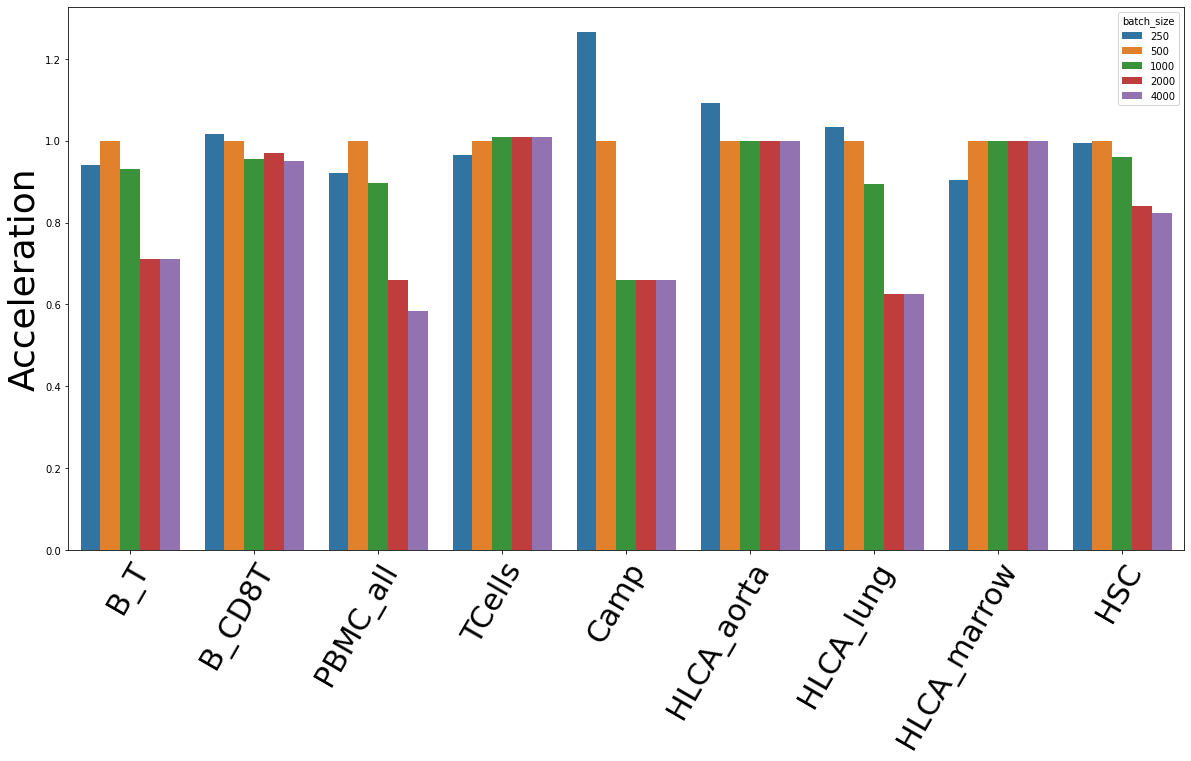

In [15]:
figure, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))

BASE_FONT_SIZE=20

plot = sns.barplot(data=all_df, hue='batch_size', y='acceleration', x='dataset', ax=ax)
plot.set_xticklabels(plot.get_xticklabels(), rotation=60, fontsize=BASE_FONT_SIZE * 1.5, ha='right', va='top', rotation_mode='anchor')
plot.set_ylabel(f'Acceleration', fontsize=BASE_FONT_SIZE * 1.8)
plot.set_xlabel(f'', fontsize=BASE_FONT_SIZE * 1.5)
plt.savefig('acceleration-batch-size-real.png', bbox_inches='tight', dpi=300)